 Load the dataset

In [3]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

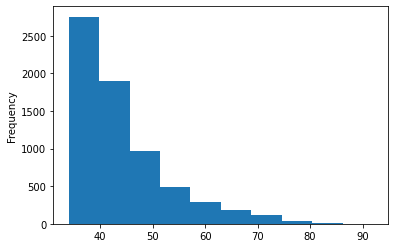

In [4]:
import matplotlib.pyplot as plt
df[df['Age'] > 33]['Age'].plot.hist()

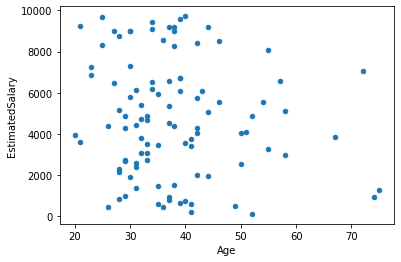

In [5]:
df[df['EstimatedSalary'] < 10000].sample(100).plot.scatter(x='Age', y='EstimatedSalary')

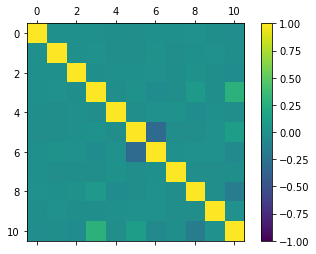

In [7]:
 correlations=df.corr()
 fig=plt.figure()
 ax=fig.add_subplot(111)
 cax=ax.matshow(correlations,vmin=-1,vmax=1)
 fig.colorbar(cax)

In [8]:
import numpy as np
print(df['Age'].mean())

38.9218


In [9]:
print(df['Age'].sum())

389218


In [11]:
missing_values_count = df.isnull().sum()
missing_values_count[0:12]

RowNumber         0
CustomerId        0
Surname           0
CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
dtype: int64

In [12]:
median = float(df['Age'].median())
df["Age"] = np.where(df["Age"] > median, median, df['Age'])

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,37.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,37.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,37.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,37.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,37.0,2,125510.82,1,1,1,79084.10,0


In [14]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,37.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,37.0,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1,0,38190.78,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
print(pd)

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>


In [17]:
df[["CustomerId", "Balance"]] = min_max_scaler.fit_transform(df[["CustomerId", "Balance"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    0.275616   Hargrave          619    France  Female   
1             2    0.326454       Hill          608     Spain  Female   
2             3    0.214421       Onio          502    France  Female   
3             4    0.542636       Boni          699    France  Female   
4             5    0.688778   Mitchell          850     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    0.162119   Obijiaku          771    France    Male   
9996       9997    0.016765  Johnstone          516    France    Male   
9997       9998    0.075327        Liu          709    France  Female   
9998       9999    0.466637  Sabbatini          772   Germany    Male   
9999      10000    0.250483     Walker          792    France  Female   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     1.000000     0.2  0.000000             

In [18]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
print(training_data)

      RowNumber  CustomerId       Surname  CreditScore Geography  Gender  \
3555       3556    0.253583         Fomin          528    France  Female   
4078       4079    0.498978        Stiles          656     Spain    Male   
8445       8446    0.450548  Parry-Okeden          683    France  Female   
5939       5940    0.576665            He          766   Germany    Male   
5583       5584    0.219522          Dunn          695     Spain  Female   
...         ...         ...           ...          ...       ...     ...   
805         806    0.761333        Hooper          790     Spain  Female   
4169       4170    0.604135       Basedow          513     Spain  Female   
588         589    0.196333           Hao          526    France    Male   
6968       6969    0.624395          Chiu          510   Germany  Female   
2547       2548    0.276296         Mario          682     Spain  Female   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3555  0.9

In [19]:
print(testing_data)

      RowNumber  CustomerId   Surname  CreditScore Geography  Gender  \
8             9    0.906696        He          501    France    Male   
14           15    0.140730     Scott          635     Spain  Female   
23           24    0.640172    Mosman          669    France    Male   
25           26    0.689990   Maclean          577    France    Male   
26           27    0.684490     Young          756   Germany    Male   
...         ...         ...       ...          ...       ...     ...   
9954       9955    0.696627  Trentino          645    France    Male   
9959       9960    0.448348    Graham          764     Spain    Male   
9986       9987    0.064143  Bartlett          673   Germany    Male   
9988       9989    0.094516   Pirozzi          775    France    Male   
9995       9996    0.162119  Obijiaku          771    France    Male   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8     1.000000     0.4  0.566170              2          